In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges,friends,enemies,chips,fries,ramen,toportyu
0,19,female,NaN,0,yes,southwest,16884.92400,5,3,7,5,3,6
1,18,male,33.770,1,no,southeast,1725.55230,0,1,4,4,4,3
2,28,male,33.000,3,no,southeast,4449.46200,9,3,5,2,1,3
3,33,male,22.705,0,no,northwest,21984.47061,5,10,4,3,2,4
4,32,male,28.880,0,no,northwest,3866.85520,4,3,4,4,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,4,2,2,3,1,6
1334,18,female,31.920,0,no,northeast,2205.98080,6,2,7,6,4,6
1335,18,female,36.850,0,no,southeast,1629.83350,10,9,5,6,2,5
1336,21,female,25.800,0,no,southwest,2007.94500,2,6,6,3,5,2


In [5]:
df = df.drop(["friends","enemies","chips","fries","ramen","toportyu"],axis=1)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1327 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age          0
sex          0
bmi         11
children     0
smoker       0
region       0
charges      0
dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1327.000000,1338.000000,1338.000000
mean,40.670404,30.667841,1.094918,13270.422265
std,34.784427,6.103216,1.205493,12110.011237
min,-3.000000,15.960000,0.000000,1121.873900
25%,26.250000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,999.000000,53.130000,5.000000,63770.428010


In [10]:
df[["sex","smoker","region"]].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,5
top,male,no,southeast
freq,676,1064,360


In [11]:
df["region"].value_counts(dropna=False)

southeast    360
northwest    324
southwest    324
northeast    320
middle        10
Name: region, dtype: int64

In [12]:
df.nunique()

age           54
sex            2
bmi          546
children       6
smoker         2
region         5
charges     1337
dtype: int64

In [ ]:
sns.pairplot(df)

In [14]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.049822,0.014142,0.098401
bmi,0.049822,1.000000,0.013350,0.200791
children,0.014142,0.013350,1.000000,0.067998
charges,0.098401,0.200791,0.067998,1.000000


<AxesSubplot:>

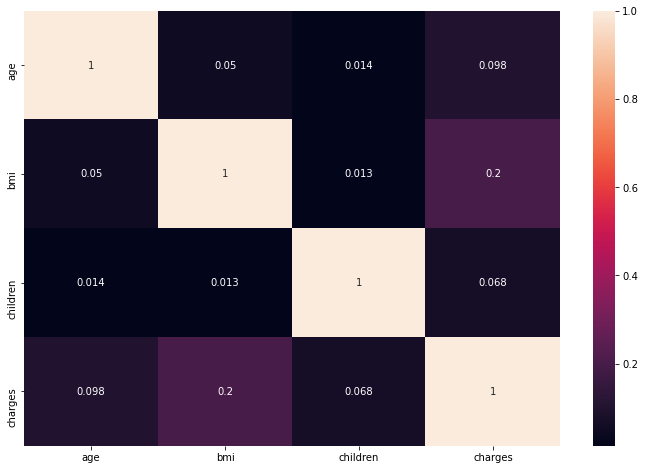

In [15]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)

In [16]:
df["age"]

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [17]:
from datetime import date

In [18]:
date.today().year

2022

In [19]:
date.today().year-df["age"]

0       2003
1       2004
2       1994
3       1989
4       1990
        ... 
1333    1972
1334    2004
1335    2004
1336    2001
1337    1961
Name: age, Length: 1338, dtype: int64

In [20]:
df.rename({"charges":"insurance_price"},axis=1,inplace=True)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,insurance_price
0,19,female,NaN,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df.isnull().sum()

age                 0
sex                 0
bmi                11
children            0
smoker              0
region              0
insurance_price     0
dtype: int64

In [23]:
df[df["bmi"].isnull()]

,age,sex,bmi,children,smoker,region,insurance_price
0,19,female,NaN,0,yes,southwest,16884.92400
50,18,female,NaN,0,no,northeast,2211.13075
98,56,male,NaN,0,yes,northeast,22412.64850
194,18,male,NaN,0,no,southeast,1137.46970
293,22,female,NaN,0,no,southeast,2156.75180
386,58,female,NaN,0,no,southeast,11856.41150
509,57,female,NaN,0,no,southwest,11455.28000
611,38,female,NaN,2,no,southwest,6571.54400
686,42,male,NaN,2,no,northeast,7729.64575
737,26,male,NaN,2,no,southwest,3484.33100


<AxesSubplot:>

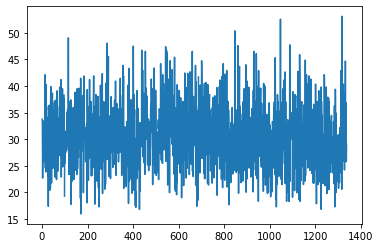

In [24]:
df["bmi"].plot()

In [25]:
df["bmi"].sort_values()

172     15.960
1226    16.815
428     16.815
412     17.195
250     17.290
         ...  
509        NaN
611        NaN
686        NaN
737        NaN
776        NaN
Name: bmi, Length: 1338, dtype: float64

In [26]:
df[df["bmi"].isnull()]

,age,sex,bmi,children,smoker,region,insurance_price
0,19,female,NaN,0,yes,southwest,16884.92400
50,18,female,NaN,0,no,northeast,2211.13075
98,56,male,NaN,0,yes,northeast,22412.64850
194,18,male,NaN,0,no,southeast,1137.46970
293,22,female,NaN,0,no,southeast,2156.75180
386,58,female,NaN,0,no,southeast,11856.41150
509,57,female,NaN,0,no,southwest,11455.28000
611,38,female,NaN,2,no,southwest,6571.54400
686,42,male,NaN,2,no,northeast,7729.64575
737,26,male,NaN,2,no,southwest,3484.33100


In [27]:
df["bmi"].fillna(method="bfill")

0       33.770
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [28]:
df[(df["sex"]=="female")]["bmi"].mean()

30.358498475609778

In [29]:
df[(df["sex"]=="female") & (df["bmi"].isnull())]

,age,sex,bmi,children,smoker,region,insurance_price
0,19,female,NaN,0,yes,southwest,16884.92400
50,18,female,NaN,0,no,northeast,2211.13075
293,22,female,NaN,0,no,southeast,2156.75180
386,58,female,NaN,0,no,southeast,11856.41150
509,57,female,NaN,0,no,southwest,11455.28000
611,38,female,NaN,2,no,southwest,6571.54400


In [30]:
df[(df["sex"]=="female") & (df["bmi"].isnull())]=df[(df["sex"]=="female") & (df["bmi"].isnull())].fillna(df[(df["sex"]=="female")]["bmi"].mean())

In [31]:
df

,age,sex,bmi,children,smoker,region,insurance_price
0,19,female,30.358498,0,yes,southwest,16884.92400
1,18,male,33.770000,1,no,southeast,1725.55230
2,28,male,33.000000,3,no,southeast,4449.46200
3,33,male,22.705000,0,no,northwest,21984.47061
4,32,male,28.880000,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970000,3,no,northwest,10600.54830
1334,18,female,31.920000,0,no,northeast,2205.98080
1335,18,female,36.850000,0,no,southeast,1629.83350
1336,21,female,25.800000,0,no,southwest,2007.94500


In [32]:
df.loc[293]

age                       22
sex                   female
bmi                30.358498
children                   0
smoker                    no
region             southeast
insurance_price    2156.7518
Name: 293, dtype: object

In [33]:
df.isnull().sum()

age                0
sex                0
bmi                5
children           0
smoker             0
region             0
insurance_price    0
dtype: int64

In [34]:
df[df["sex"]=="male"]["bmi"].mean()

30.970268256333803

In [35]:
df[df["bmi"].isnull()] = df[df["bmi"].isnull()].fillna(df[df["sex"]=="male"]["bmi"].mean())

In [36]:
df

,age,sex,bmi,children,smoker,region,insurance_price
0,19,female,30.358498,0,yes,southwest,16884.92400
1,18,male,33.770000,1,no,southeast,1725.55230
2,28,male,33.000000,3,no,southeast,4449.46200
3,33,male,22.705000,0,no,northwest,21984.47061
4,32,male,28.880000,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970000,3,no,northwest,10600.54830
1334,18,female,31.920000,0,no,northeast,2205.98080
1335,18,female,36.850000,0,no,southeast,1629.83350
1336,21,female,25.800000,0,no,southwest,2007.94500


In [37]:
df.isnull().sum()

age                0
sex                0
bmi                0
children           0
smoker             0
region             0
insurance_price    0
dtype: int64

In [38]:
df[df["bmi"]==30.970268256333803]

,age,sex,bmi,children,smoker,region,insurance_price
98,56,male,30.970268,0,yes,northeast,22412.64850
194,18,male,30.970268,0,no,southeast,1137.46970
686,42,male,30.970268,2,no,northeast,7729.64575
737,26,male,30.970268,2,no,southwest,3484.33100
776,40,male,30.970268,2,no,northwest,6986.69700


<AxesSubplot:>

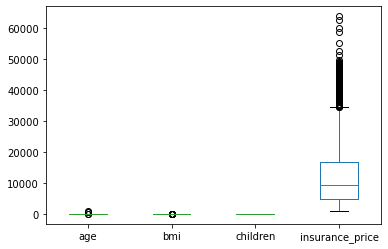

In [39]:
df.plot(kind="box")

<AxesSubplot:>

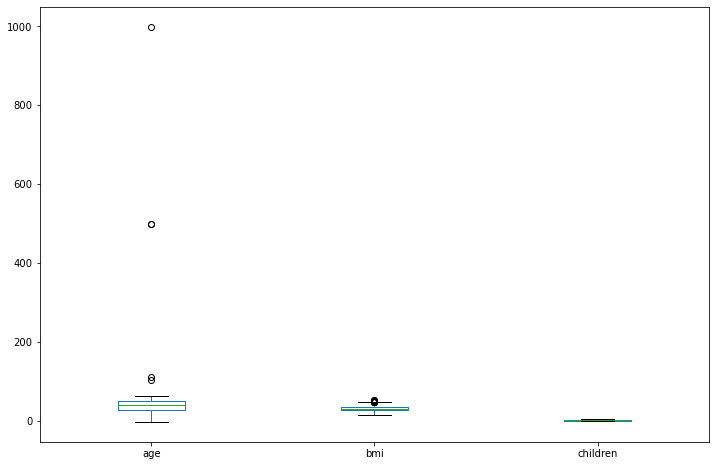

In [40]:
df.drop("insurance_price",axis=1).plot(kind="box",figsize=(12,8))

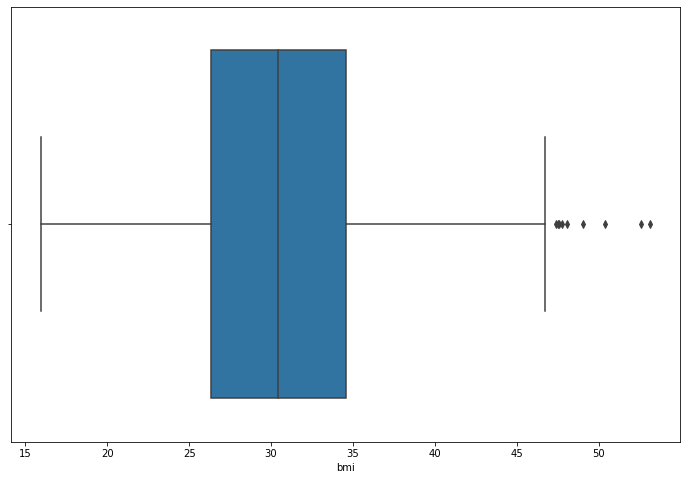

In [41]:
plt.figure(figsize = (12,8))
sns.boxplot(x=df["bmi"]);

In [42]:
df["bmi"].describe()

count    1338.000000
mean       30.667584
std         6.078120
min        15.960000
25%        26.315000
50%        30.400000
75%        34.595000
max        53.130000
Name: bmi, dtype: float64

In [43]:
df["bmi"].quantile(0.25)

26.315

In [44]:
df["bmi"].quantile(0.75)

34.595

In [45]:
iqr = df["bmi"].quantile(0.75) - df["bmi"].quantile(0.25)

In [46]:
iqr

8.279999999999998

In [47]:
upper_bound = df["bmi"].quantile(0.75) + 1.5*iqr

In [48]:
upper_bound

47.01499999999999

In [49]:
df[df["bmi"] > upper_bound]

,age,sex,bmi,children,smoker,region,insurance_price
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [50]:
df[df["bmi"]>50].index

Int64Index([847, 1047, 1317], dtype='int64')

In [51]:
df.drop(index=df[df["bmi"]>50].index,inplace=True)

In [52]:
df.reset_index(drop=True,inplace=True)

In [53]:
df[df["bmi"]>50].index

Int64Index([], dtype='int64')

In [54]:
df[df["bmi"] > upper_bound]

,age,sex,bmi,children,smoker,region,insurance_price
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
859,37,female,47.60,2,yes,southwest,46113.51100
1086,52,male,47.74,1,no,southeast,9748.91060


In [55]:
from scipy.stats.mstats import winsorize

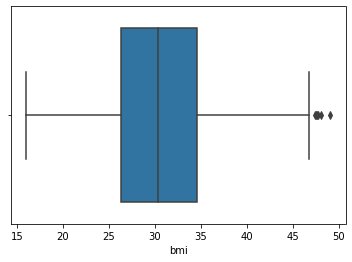

In [56]:
sns.boxplot(x = df["bmi"]);

In [57]:
upper_bound

47.01499999999999

In [122]:
df["bmi"].quantile(0.995)

46.71775

In [59]:
df["bmi"].quantile(0)

15.96

In [60]:
winsorize(df["bmi"],(0,0.005))

masked_array(data=[30.35849848, 33.77      , 33.        , ...,
                   36.85      , 25.8       , 29.07      ],
             mask=False,
       fill_value=1e+20)

In [61]:
pd.Series(winsorize(df["bmi"],(0,0.005)))

0       30.358498
1       33.770000
2       33.000000
3       22.705000
4       28.880000
          ...    
1330    30.970000
1331    31.920000
1332    36.850000
1333    25.800000
1334    29.070000
Length: 1335, dtype: float64

<AxesSubplot:>

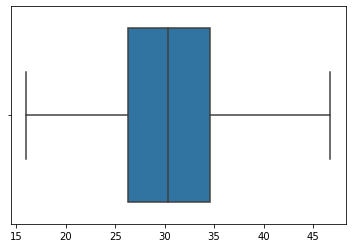

In [62]:
sns.boxplot(x=pd.Series(winsorize(df["bmi"],(0,0.005))))

In [63]:
df["bmi"].sort_values(ascending=False).head(10)

116     49.06
286     48.07
1086    47.74
859     47.60
401     47.52
543     47.41
438     46.75
547     46.70
929     46.53
660     46.53
Name: bmi, dtype: float64

In [64]:
pd.Series(winsorize(df["bmi"],(0,0.005))).sort_values(ascending=False)

543     46.750
286     46.750
1086    46.750
116     46.750
438     46.750
         ...  
250     17.290
412     17.195
428     16.815
1224    16.815
172     15.960
Length: 1335, dtype: float64

In [65]:
df["bmi"].describe()

count    1335.000000
mean       30.619579
std         5.999572
min        15.960000
25%        26.315000
50%        30.360000
75%        34.540000
max        49.060000
Name: bmi, dtype: float64

In [66]:
pd.Series(winsorize(df["bmi"],(0,0.005))).describe()

count    1335.000000
mean       30.614410
std         5.985033
min        15.960000
25%        26.315000
50%        30.360000
75%        34.540000
max        46.750000
dtype: float64

In [67]:
df["bmi"] = pd.Series(winsorize(df["bmi"],(0,0.005)))

<AxesSubplot:>

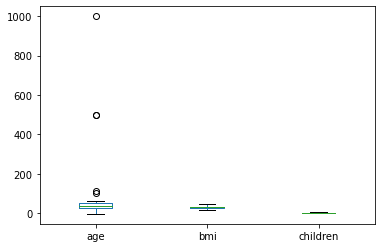

In [68]:
df.drop("insurance_price", axis =1).plot(kind="box")

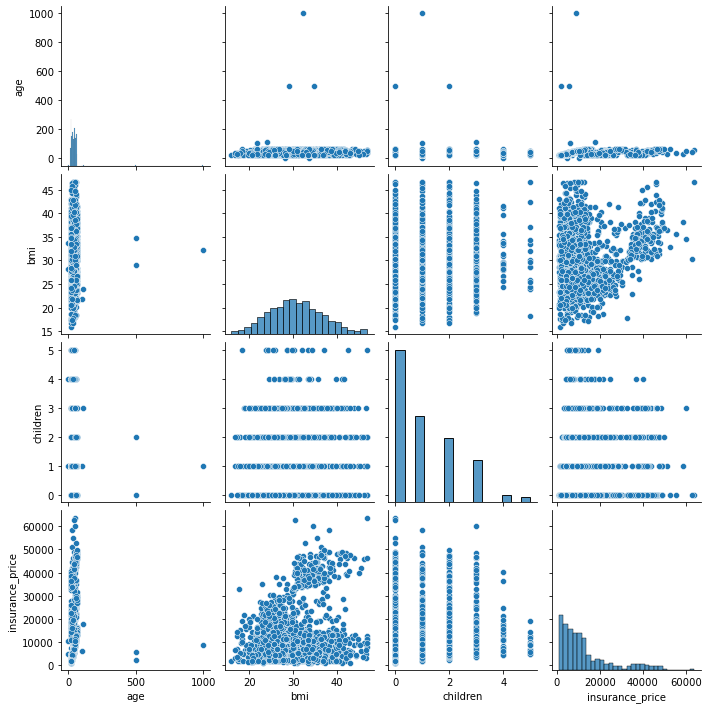

In [69]:
sns.pairplot(df)

In [70]:
df.groupby("smoker").mean()

,age,bmi,children,insurance_price
smoker,,,,
no,41.186441,30.599561,1.091337,8446.760783
yes,38.879121,30.672175,1.113553,32004.623164


In [71]:
df.groupby("smoker").describe().T

smoker                           no           yes
age             count   1062.000000    273.000000
                mean      41.186441     38.879121
                std       38.315387     14.571958
                min       -3.000000     18.000000
                25%       27.000000     27.000000
                50%       40.000000     39.000000
                75%       52.000000     50.000000
                max      999.000000    111.000000
bmi             count   1062.000000    273.000000
                mean      30.599561     30.672175
                std        5.947915      6.138065
                min       15.960000     17.195000
                25%       26.315000     26.125000
                50%       30.358498     30.495000
                75%       34.320000     35.200000
                max       46.750000     46.750000
children        count   1062.000000    273.000000
                mean       1.091337      1.113553
                std        1.218820      1.159170
                min        0.000000      0.000000
                25%        0.000000      0.000000
                50%        1.000000      1.000000
                75%        2.000000      2.000000
                max        5.000000      5.000000
insurance_price count   1062.000000    273.000000
                mean    8446.760783  32004.623164
                std     5992.434522  11537.980207
                min     1121.873900  12829.455100
                25%     3990.925200  20773.627750
                50%     7346.934300  34439.855900
                75%    11363.151150  40974.164900
                max    36910.608030  63770.428010

In [72]:
df.groupby("sex").mean()

,age,bmi,children,insurance_price
sex,,,,
female,41.607251,30.354224,1.074018,12569.578844
male,39.836553,30.870344,1.117385,13947.490164


In [73]:
df.groupby("region").mean()

,age,bmi,children,insurance_price
region,,,,
middle,48.500000,32.108000,1.300000,16630.922820
northeast,39.025000,29.215075,1.040625,13454.133794
northwest,42.067901,29.203705,1.151235,12423.939369
southeast,42.095238,33.132037,1.053221,14602.658539
southwest,39.268519,30.587024,1.135802,12338.224008


<AxesSubplot:xlabel='insurance_price', ylabel='smoker'>

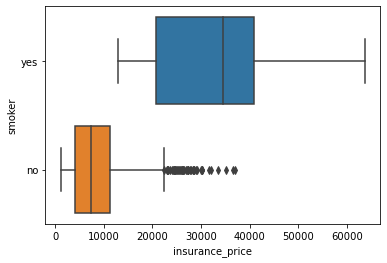

In [74]:
sns.boxplot(x="insurance_price", y = "smoker", data=df)

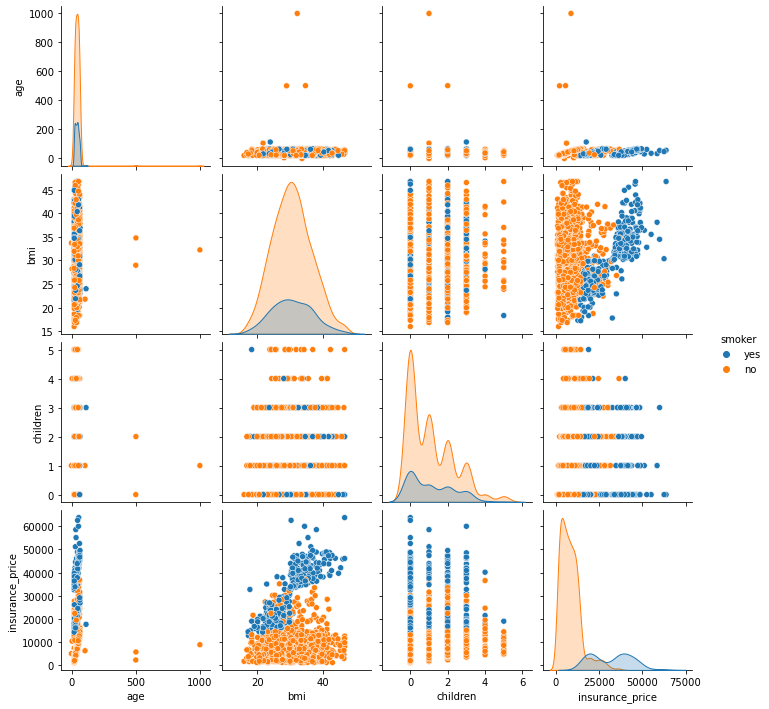

In [75]:
sns.pairplot(df, hue="smoker")

In [76]:
df[df["age"]>70].index

Int64Index([42, 69, 93, 122, 201], dtype='int64')

In [77]:
df.drop(index=[42, 69, 93, 122, 201],inplace=True)

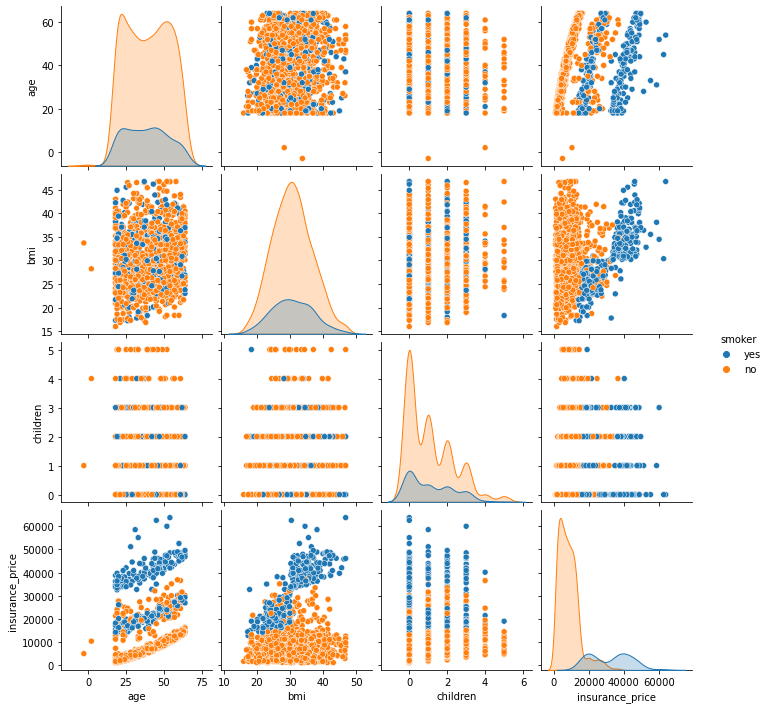

In [78]:
sns.pairplot(df, hue="smoker")

<AxesSubplot:xlabel='bmi', ylabel='insurance_price'>

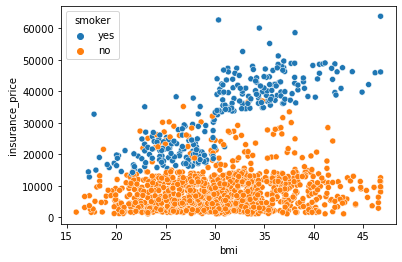

In [79]:
sns.scatterplot(x="bmi", y="insurance_price", data = df, hue="smoker")

In [80]:
df[(df["smoker"]=="yes") & (df["bmi"]>30)]["insurance_price"].describe()

count      145.000000
mean     41369.383925
std       6359.108766
min      16884.924000
25%      37133.898200
50%      40720.551050
75%      45702.022350
max      63770.428010
Name: insurance_price, dtype: float64

In [81]:
df[(df["smoker"]=="yes") & (df["bmi"]<30)]["insurance_price"].describe()

count      126.000000
mean     21419.795860
std       5099.646735
min      12829.455100
25%      17787.511413
50%      20201.095390
75%      24162.428262
max      38245.593270
Name: insurance_price, dtype: float64

In [82]:
def fill_value(df):
    
    if (df["smoker"]=="yes") & (df["bmi"]>30):
            
        return "smoking and obese"
    
    if (df["smoker"]=="yes") & (df["bmi"]<30):
        
        return "smoking and normal"
    
    return "standard"

In [83]:
df["segments"] = df.apply(fill_value, axis = 1)

In [84]:
df

,age,sex,bmi,children,smoker,region,insurance_price,segments
0,19,female,30.358498,0,yes,southwest,16884.92400,smoking and obese
1,18,male,33.770000,1,no,southeast,1725.55230,standard
2,28,male,33.000000,3,no,southeast,4449.46200,standard
3,33,male,22.705000,0,no,northwest,21984.47061,standard
4,32,male,28.880000,0,no,northwest,3866.85520,standard
...,...,...,...,...,...,...,...,...
1330,50,male,30.970000,3,no,northwest,10600.54830,standard
1331,18,female,31.920000,0,no,northeast,2205.98080,standard
1332,18,female,36.850000,0,no,southeast,1629.83350,standard
1333,21,female,25.800000,0,no,southwest,2007.94500,standard


<AxesSubplot:xlabel='age', ylabel='insurance_price'>

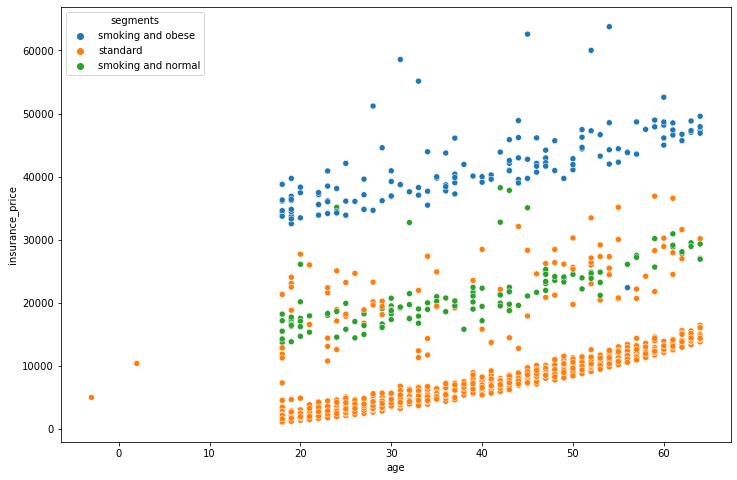

In [85]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="age", y="insurance_price",data=df,hue="segments")

In [86]:
df["bmi_labels"] = pd.cut(df["bmi"], bins = [0,18.5,25,30,35,99], labels = ["Underweight", "Normal","Overweight", "Obese","Extra_Obes"])

In [87]:
df

,age,sex,bmi,children,smoker,region,insurance_price,segments,bmi_labels
0,19,female,30.358498,0,yes,southwest,16884.92400,smoking and obese,Obese
1,18,male,33.770000,1,no,southeast,1725.55230,standard,Obese
2,28,male,33.000000,3,no,southeast,4449.46200,standard,Obese
3,33,male,22.705000,0,no,northwest,21984.47061,standard,Normal
4,32,male,28.880000,0,no,northwest,3866.85520,standard,Overweight
...,...,...,...,...,...,...,...,...,...
1330,50,male,30.970000,3,no,northwest,10600.54830,standard,Obese
1331,18,female,31.920000,0,no,northeast,2205.98080,standard,Obese
1332,18,female,36.850000,0,no,southeast,1629.83350,standard,Extra_Obes
1333,21,female,25.800000,0,no,southwest,2007.94500,standard,Overweight


In [88]:
df.groupby("bmi_labels")["insurance_price"].describe().T

bmi_labels,Underweight,Normal,Overweight,Obese,Extra_Obes
count,21.000000,222.000000,381.000000,395.000000,311.000000
mean,8657.620652,10398.995503,11035.874596,14371.229771,17026.488119
std,7591.730101,7473.069649,8087.574774,13527.517934,15561.896873
min,1621.340200,1121.873900,1252.407000,1131.506600,1141.445100
25%,2775.192150,4146.836312,4661.286350,4692.513600,5841.719000
50%,6640.544850,8604.153525,8703.456000,9583.893300,10959.694700
75%,12829.455100,14676.780550,15828.821730,16691.454825,27095.693060
max,32734.186300,35069.374520,38245.593270,62592.873090,63770.428010


In [92]:
df.drop(["segments","bmi_labels"], axis=1, inplace=True)

In [95]:
df.reset_index(drop=True)

,age,sex,bmi,children,smoker,region,insurance_price
0,19,female,30.358498,0,yes,southwest,16884.92400
1,18,male,33.770000,1,no,southeast,1725.55230
2,28,male,33.000000,3,no,southeast,4449.46200
3,33,male,22.705000,0,no,northwest,21984.47061
4,32,male,28.880000,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1325,50,male,30.970000,3,no,northwest,10600.54830
1326,18,female,31.920000,0,no,northeast,2205.98080
1327,18,female,36.850000,0,no,southeast,1629.83350
1328,21,female,25.800000,0,no,southwest,2007.94500


In [97]:
pd.get_dummies(df)

,age,bmi,children,insurance_price,sex_female,sex_male,smoker_no,smoker_yes,region_middle,region_northeast,region_northwest,region_southeast,region_southwest
0,19,30.358498,0,16884.92400,1,0,0,1,0,0,0,0,1
1,18,33.770000,1,1725.55230,0,1,1,0,0,0,0,1,0
2,28,33.000000,3,4449.46200,0,1,1,0,0,0,0,1,0
3,33,22.705000,0,21984.47061,0,1,1,0,0,0,1,0,0
4,32,28.880000,0,3866.85520,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,50,30.970000,3,10600.54830,0,1,1,0,0,0,1,0,0
1331,18,31.920000,0,2205.98080,1,0,1,0,0,1,0,0,0
1332,18,36.850000,0,1629.83350,1,0,1,0,0,0,0,1,0
1333,21,25.800000,0,2007.94500,1,0,1,0,0,0,0,0,1


In [103]:
df = pd.get_dummies(df, drop_first=True)

<AxesSubplot:>

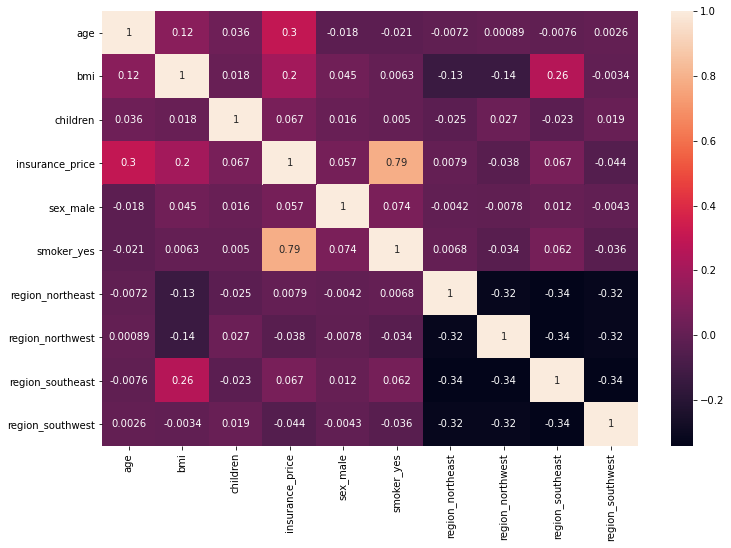

In [104]:
plt.figure(figsize = (12,8))
sns.heatmap(pd.get_dummies(df, drop_first = True).corr(), annot =True)

<AxesSubplot:xlabel='smoker_yes', ylabel='insurance_price'>

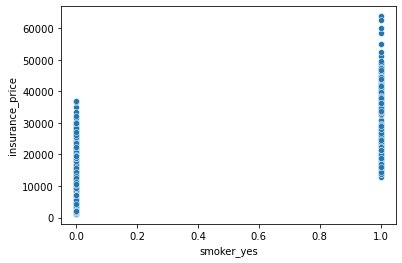

In [107]:
sns.scatterplot (x = "smoker_yes", y = "insurance_price", data = df)

<AxesSubplot:xlabel='smoker_yes', ylabel='insurance_price'>

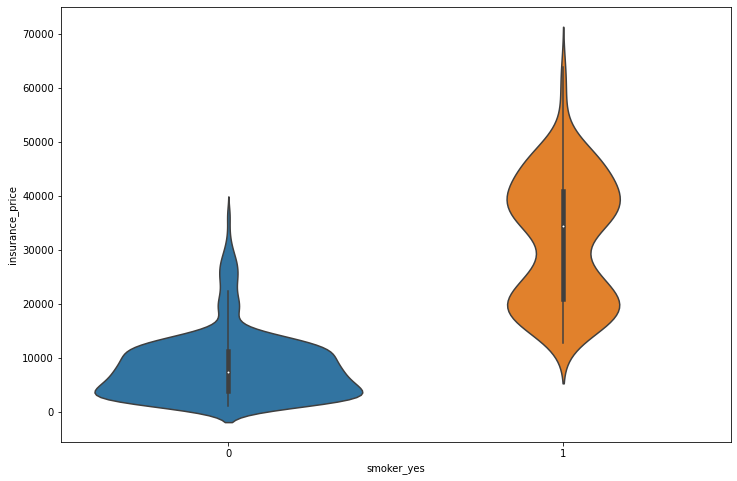

In [109]:
plt.figure(figsize = (12,8))
sns.violinplot(x = "smoker_yes", y = "insurance_price", data = df)

C:\Users\potar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker_yes', ylabel='insurance_price'>

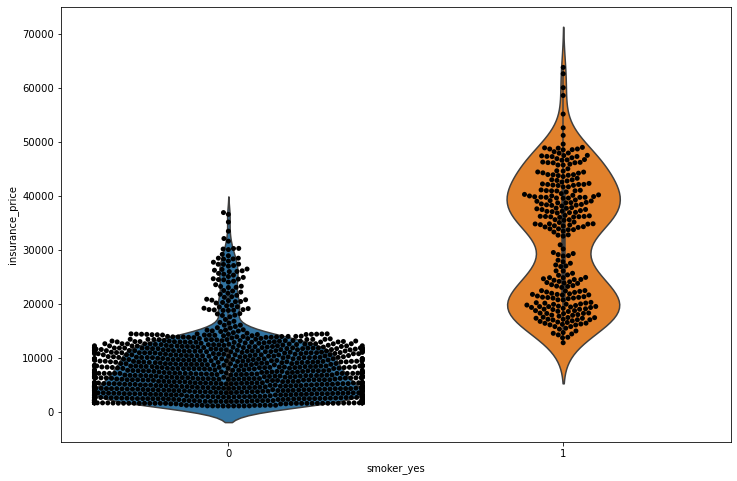

In [115]:
plt.figure(figsize = (12,8))
sns.violinplot(x = "smoker_yes", y = "insurance_price", data = df)
sns.swarmplot(x = "smoker_yes", y = "insurance_price", data = df,color="black")